# Sample Data Exploration

The purpose of this notebook is to explore the data contained in the sample loan origination data provided by Freddie Mac.

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('merged_origination_samples.csv')

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,FICO_CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOME_BUYER,MATURITY_DATE,METRO_STATISTICAL_AREA_CODE,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_ID,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,FLAG_SOURCE
0,635,200212,N,202904,10420.0,0,1,P,76,21,...,OH,SF,44700.0,F199Q1000024,P,317,2,Other sellers,Other servicers,NaN
1,787,199905,N,202904,12060.0,999,1,P,80,18,...,GA,PU,30500.0,F199Q1000036,P,360,2,FT MORTGAGE COMPANIE,CHASEMTGECO,NaN
2,726,199904,N,202903,28140.0,0,1,P,80,37,...,KS,SF,66000.0,F199Q1000060,P,360,2,FLEET MORTGAGE CORPO,Other servicers,NaN
3,748,199905,9,202904,17140.0,999,1,P,80,28,...,OH,SF,45200.0,F199Q1000097,N,360,2,Other sellers,Other servicers,NaN
4,720,199905,9,202904,42044.0,999,1,I,24,11,...,CA,SF,92800.0,F199Q1000109,C,360,2,"NORWEST MORTGAGE, IN",WELLSFARGOHOMEMORTGA,NaN


## Change Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912481 entries, 0 to 912480
Data columns (total 26 columns):
FICO_CREDIT_SCORE                  912481 non-null int64
FIRST_PAYMENT_DATE                 912481 non-null int64
FIRST_TIME_HOME_BUYER              912481 non-null object
MATURITY_DATE                      912481 non-null int64
METRO_STATISTICAL_AREA_CODE        786255 non-null float64
MORTGAGE_INSURANCE_PERCENTAGE      912481 non-null int64
NUMBER_OF_UNITS                    912481 non-null int64
OCCUPANCY_STATUS                   912481 non-null object
ORIGINAL_COMBINED_LOAN_TO_VALUE    912481 non-null int64
ORIGINAL_DEBT_TO_INCOME_RATIO      912481 non-null int64
ORIGINAL_UPB                       912481 non-null int64
ORIGINAL_LOAN_TO_VALUE             912481 non-null int64
ORIGINAL_INTEREST_RATE             912481 non-null float64
CHANNEL                            912481 non-null object
PREPAYMENT_PENALTY_MORTGAGE        907841 non-null object
PRODUCT_TYPE              

## Pairplot

reference: https://stackoverflow.com/a/28155580 - selecting numeric values

In [5]:
# sns.pairplot(df.select_dtypes(include=[np.number]).fillna(0))
# plt.savefig('origination_pairplot.png')

In [6]:
df.MATURITY_DATE.head()

0    202904
1    202904
2    202903
3    202904
4    202904
Name: MATURITY_DATE, dtype: int64

In [7]:
pd.to_datetime(df.MATURITY_DATE,format='%Y%m').head()

0   2029-04-01
1   2029-04-01
2   2029-03-01
3   2029-04-01
4   2029-04-01
Name: MATURITY_DATE, dtype: datetime64[ns]

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


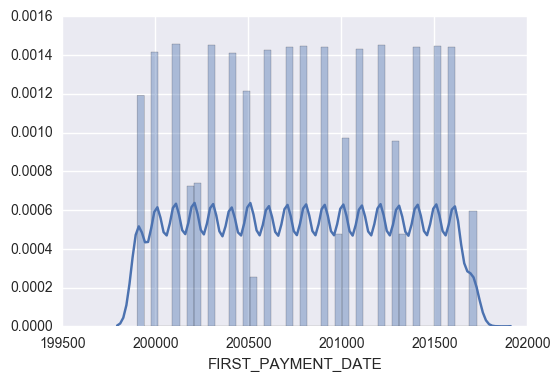

In [8]:
sns.distplot(df.FIRST_PAYMENT_DATE)

In [9]:
df.FIRST_PAYMENT_DATE = pd.to_datetime(df.FIRST_PAYMENT_DATE, format='%Y%m', infer_datetime_format=True)
df.MATURITY_DATE = pd.to_datetime(df.MATURITY_DATE, format='%Y%m', infer_datetime_format=True)

In [10]:
df.MATURITY_DATE.head()

0   2029-04-01
1   2029-04-01
2   2029-03-01
3   2029-04-01
4   2029-04-01
Name: MATURITY_DATE, dtype: datetime64[ns]

## FICO_CREDIT_SCORE

A number, prepared by third parties, summarizing the borrower’s creditworthiness, which may be indicative of the likelihood that the borrower will timely repay future obligations. Generally, the credit score disclosed is the score known at the time of acquisition and is the score used to originate the mortgage.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


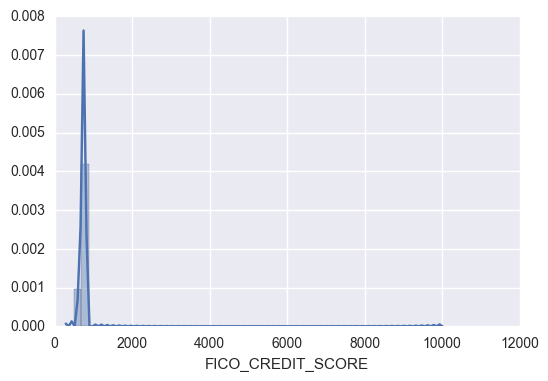

In [11]:
sns.distplot(df.FICO_CREDIT_SCORE)

In [12]:
df.FICO_CREDIT_SCORE.max()

9999

From the [data dictionary](freddie_mac_user_guide_data_dict.pdf) we can see that a FICO CREDIT SCORE outside of 301-850 indicates that the data is not available. Lets replace these values with np.nan and rerun the distplot

In [13]:
mask = (df.FICO_CREDIT_SCORE > 850) | (df.FICO_CREDIT_SCORE < 301)
df.loc[mask,'FICO_CREDIT_SCORE'] = np.nan

In [14]:
len(df.FICO_CREDIT_SCORE[df.FICO_CREDIT_SCORE.isnull()])

1974

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


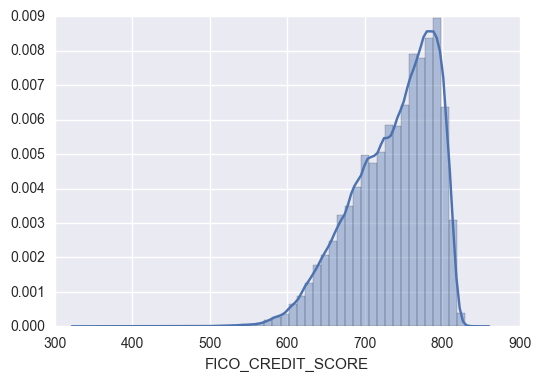

In [15]:
sns.distplot(df.FICO_CREDIT_SCORE[df.FICO_CREDIT_SCORE.notnull()])

Our data appears to be skewed towards higher credit scores.

## FIRST_PAYMENT_DATE

The date of the first scheduled mortgage payment due under the terms of the mortgage note.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

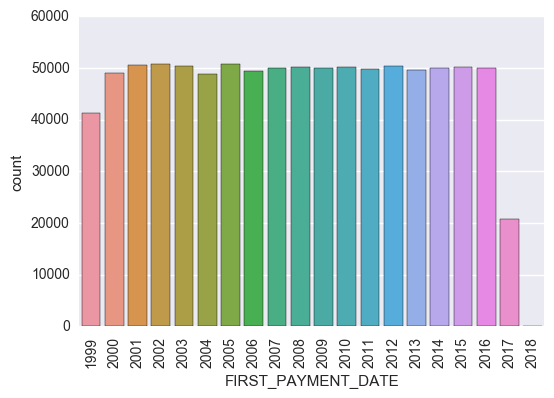

In [16]:
sns.countplot(df.FIRST_PAYMENT_DATE.dt.year)
plt.xticks(rotation=90)

2017 and 2018 should more or less be ignored given the small sample size.

## FIRST_TIME_HOME_BUYER

Indicates whether the Borrower, or one of a group of Borrowers, is an individual who (1) is purchasing the mortgaged property, (2) will reside in the mortgaged property as a primary residence and (3) had no ownership interest (sole or joint) in a residential property during the three-year period preceding the date of the purchase of the mortgaged property. With certain limited exceptions, a displaced homemaker or single parent may also be considered a First-Time Homebuyer if the individual had no ownership interest in a residential property during the preceding three-year period other than an ownership interest in the marital residence with a spouse.

Investment Properties, Second Homes and Refinance transactions are not eligible to be considered First-Time Homebuyer transactions. Therefore First Time Homebuyer does not apply and will be disclosed as “Not Applicable”, which will be indicated by a blank space.

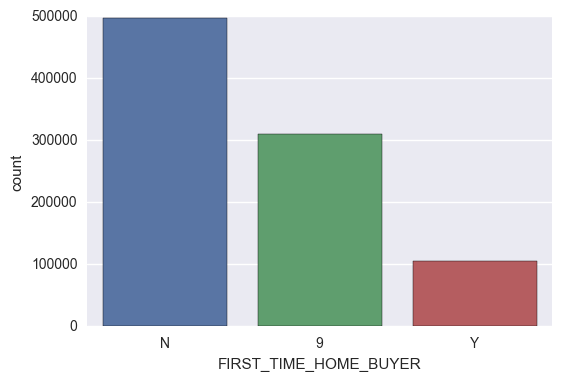

In [17]:
sns.countplot(df.FIRST_TIME_HOME_BUYER)

9 is an indication that the FIRST_TIME_HOME_BUYER field is missing. Let's replace these with np.nan

In [18]:
mask = (df.FIRST_TIME_HOME_BUYER == '9')
df.loc[mask,'FIRST_TIME_HOME_BUYER'] = np.nan

## MATURITY DATE

The month in which the final monthly payment on the mortgage is scheduled to be made as stated on the original mortgage note.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

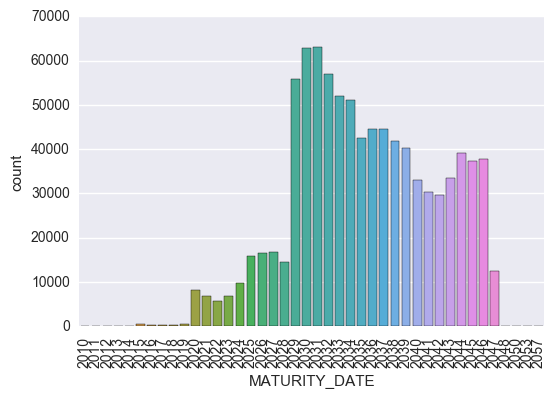

In [19]:
sns.countplot(df.MATURITY_DATE.dt.year)
plt.xticks(rotation=90)

Most of the loans mature approximately 30 years from origination, beginning in 1999 and ending in 2029, or beginning in 2018 and ending in 2048.

## METRO_STATISTICAL_AREA_CODE

This disclosure will be based on the designation of the Metropolitan Statistical Area or Metropolitan Division based on 2010 census (for Mar 2013 and May 2013 releases) and 2013 census (for Aug 2013 and Dec 2013 releases) data. Metropolitan Statistical Areas (MSAs) are defined by the United States Office of Management and Budget (OMB) and have at least one urbanized area with a population of 50,000 or more inhabitants. OMB refers to an MSA containing a single core with a population of 2.5 million or more, which may be comprised of groupings of counties, as a Metropolitan Division.

If an MSA applies to a mortgaged property, the applicable five-digit value is disclosed; however, if the mortgaged property also falls within a Metropolitan Division classification, the applicable five-digit value for the Metropolitan Division takes precedence and is disclosed instead.

Changes and/or updates in designations of MSAs or Metropolitan Division will not be reflected in the Single Family Historical Dataset.

Plot below shows the Top 30 zip codes by count in dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

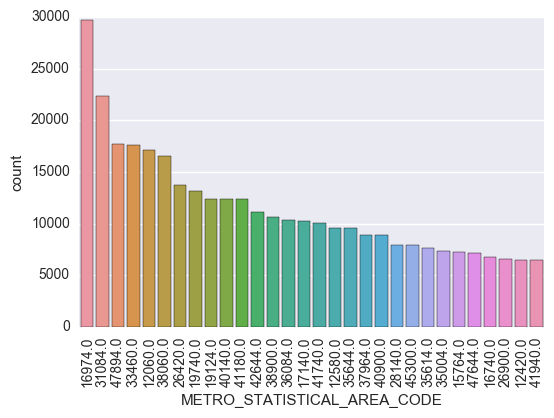

In [20]:
sns.countplot(df.METRO_STATISTICAL_AREA_CODE,order=df.METRO_STATISTICAL_AREA_CODE.value_counts().iloc[:30].index)
plt.xticks(rotation=90)

In [21]:
df.METRO_STATISTICAL_AREA_CODE.value_counts().iloc[:30].values.sum() / df.METRO_STATISTICAL_AREA_CODE.value_counts().values.sum()

0.44031770863142367

These top 30 MSAs account for ~44% of the zip codes present in our dataset

## MORTGAGE_INSURANCE_PERCENTAGE

The percentage of loss coverage on the loan, at the time of Freddie Mac’s purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan. Only primary mortgage insurance that is purchased by the Borrower, lender or Freddie Mac is disclosed. Mortgage insurance that constitutes “credit enhancement” that is not required by Freddie Mac’s Charter is not disclosed.

Amounts of mortgage insurance reported by Sellers that are less than 1% or greater than 55% will be disclosed as “Not Available,” which will be indicated 999. No MI will be indicated by three zeros.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


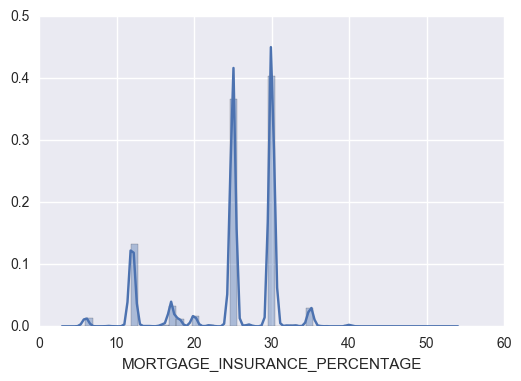

In [22]:
sns.distplot(df.MORTGAGE_INSURANCE_PERCENTAGE[(df.MORTGAGE_INSURANCE_PERCENTAGE>1) & (df.MORTGAGE_INSURANCE_PERCENTAGE<55)])

## NUMBER_OF_UNITS

Denotes whether the mortgage is a one-, two-, three-, or four-unit property.

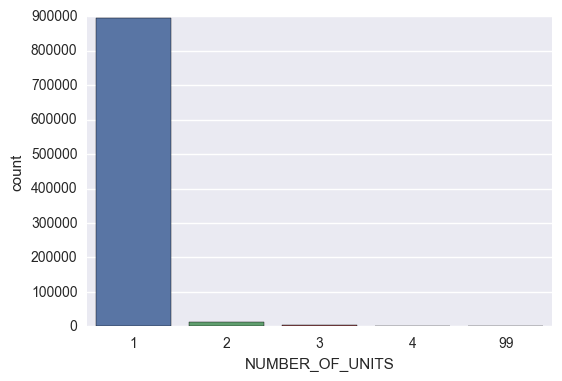

In [23]:
sns.countplot(df.NUMBER_OF_UNITS)

Our dataset is made up of mostly single unit home loans, a few duplexes.

## OCCUPANCY_STATUS

Denotes whether the mortgage type is owner occupied, second home, or investment property.

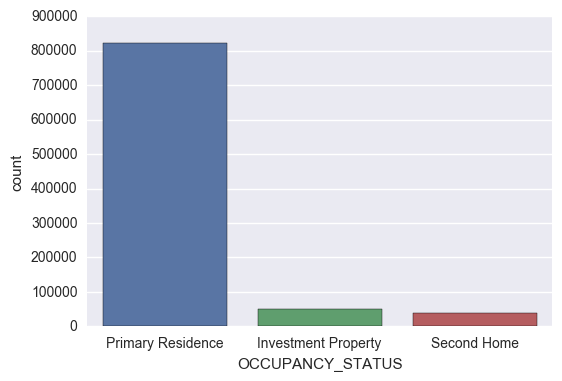

In [24]:
dict_OCCUPANCY_STATUS = {
    'P':'Primary Residence',
    'I':'Investment Property',
    'S':'Second Home',
    '9': np.nan
}
df.OCCUPANCY_STATUS = df.OCCUPANCY_STATUS.map(dict_OCCUPANCY_STATUS)
sns.countplot(df.OCCUPANCY_STATUS)

## CLTV

In the case of a purchase mortgage loan, the ratio is obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by the Seller by the lesser of the mortgaged property’s appraised value on the note date or its purchase price. In the case of a refinance mortgage loan, the ratio is obtained by dividing the original mortgage loan amount on the note date plus any secondary mortgage loan amount disclosed by the Seller by the mortgaged property’s appraised value on the note date. If the secondary financing amount disclosed by the Seller includes a home equity line of credit, then the CLTV calculation reflects the disbursed amount at closing of the first lien mortgage loan, not the maximum loan amount available under the home equity line of credit. In the case of a seasoned mortgage loan, if the Seller cannot warrant that the value of the mortgaged property has not declined since the note date, Freddie Mac requires that the Seller must provide a new appraisal value, which is used in the CLTV calculation. In certain cases, where the Seller delivered a loan to Freddie Mac with a special code indicating additional secondary mortgage loan amounts, those amounts may have been included in the CLTV calculation.

If the LTV is < 80 or > 200 or Not Available, set the CLTV to ‘Not Available.’ If the CLTV is < LTV, set the CLTV to ‘Not Available.’

This disclosure is subject to the widely varying standards originators use to verify Borrowers’ secondary mortgage loan amounts and will not be updated.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


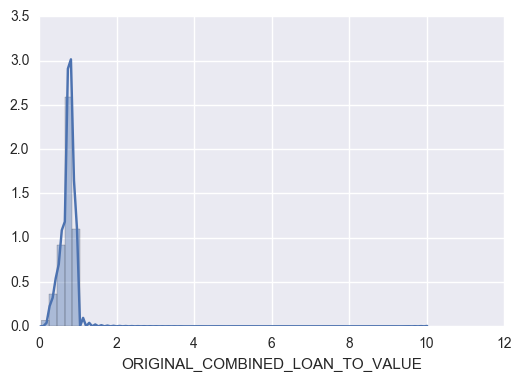

In [25]:
sns.distplot(df.ORIGINAL_COMBINED_LOAN_TO_VALUE[df.ORIGINAL_COMBINED_LOAN_TO_VALUE.notnull()]/100)

## CLTV: First Time Home Buyers

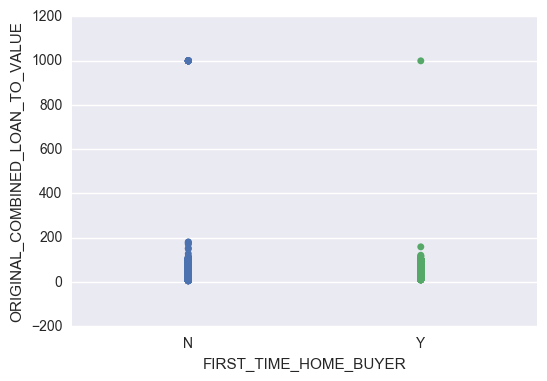

In [26]:
sns.stripplot(x="FIRST_TIME_HOME_BUYER", y="ORIGINAL_COMBINED_LOAN_TO_VALUE", data=df)

## ORIGINAL DEBT-TO-INCOME (DTI) RATIO

Disclosure of the debt to income ratio is based on (1) the sum of the borrower's monthly debt payments, including monthly housing expenses that incorporate the mortgage payment the borrower is making at the time of the delivery of the mortgage loan to Freddie Mac, divided by (2) the total monthly income used to underwrite the loan as of the date of the origination of the such loan.

Ratios greater than 65% are indicated that data is Not Available. All loans in the HARP dataset will be disclosed as Not Available.

This disclosure is subject to the widely varying standards originators use to verify Borrowers’ assets and liabilities and will not be updated.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


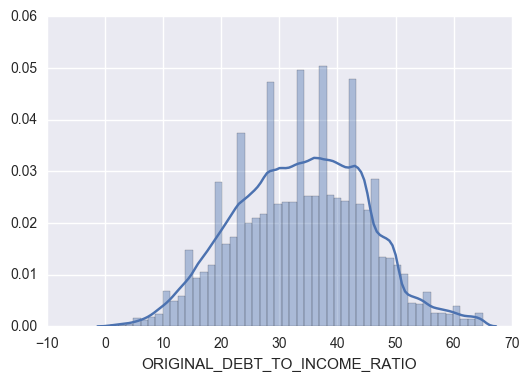

In [27]:
sns.distplot(df.ORIGINAL_DEBT_TO_INCOME_RATIO[df.ORIGINAL_DEBT_TO_INCOME_RATIO <= 65])

In [28]:
df.ORIGINAL_DEBT_TO_INCOME_RATIO[df.ORIGINAL_DEBT_TO_INCOME_RATIO > 65].count()

11732

## ORIGINAL UPB

The UPB of the mortgage on the note date.

Correct me if I'm wrong, but UPB is the Unpaid Balance?

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


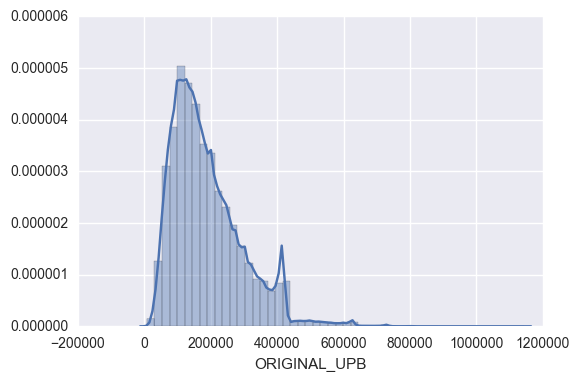

In [29]:
sns.distplot(df.ORIGINAL_UPB)

Let's look at the super long tail by itself

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(array([  300000.,   400000.,   500000.,   600000.,   700000.,   800000.,
          900000.,  1000000.,  1100000.,  1200000.]),
 <a list of 10 Text xticklabel objects>)

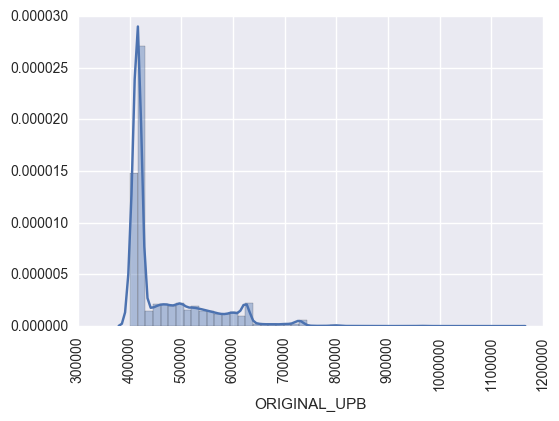

In [30]:
sns.distplot(df.ORIGINAL_UPB[df.ORIGINAL_UPB > 400000])
plt.xticks(rotation=90)

## ORIGINAL LOAN-TO-VALUE (LTV)

In the case of a purchase mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date by the lesser of the mortgaged property’s appraised value on the note date or its purchase price.

In the case of a refinance mortgage loan, the ratio obtained by dividing the original mortgage loan amount on the note date and the mortgaged property’s appraised value on the note date.

In the case of a seasoned mortgage loan, if the Seller cannot warrant that the value of the mortgaged property has not declined since the note date, Freddie Mac requires that the Seller must provide a new appraisal value, which is used in the LTV calculation.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


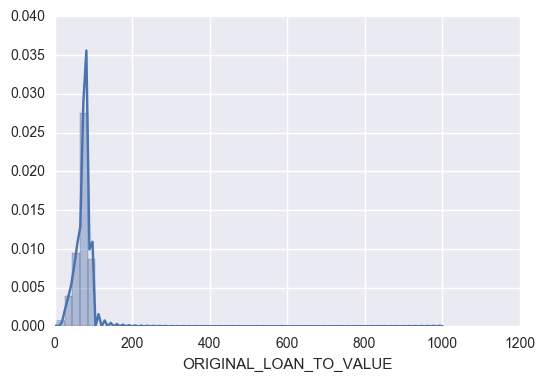

In [31]:
sns.distplot(df.ORIGINAL_LOAN_TO_VALUE)

## ORIGINAL INTEREST RATE

The original note rate as indicated on the mortgage note.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


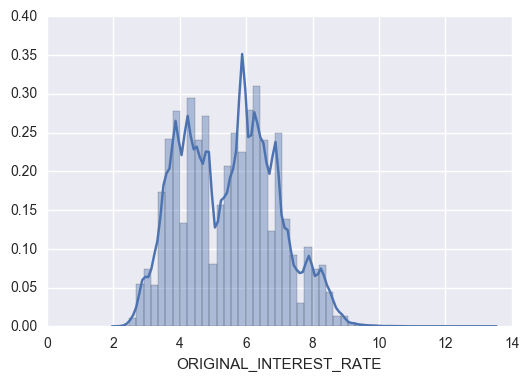

In [32]:
sns.distplot(df.ORIGINAL_INTEREST_RATE)

Interesting - distribution appears to be bimodal. Let's see if there's any relationship between FICO_CREDIT_SCORE and ORIGINAL_INTEREST_RATE

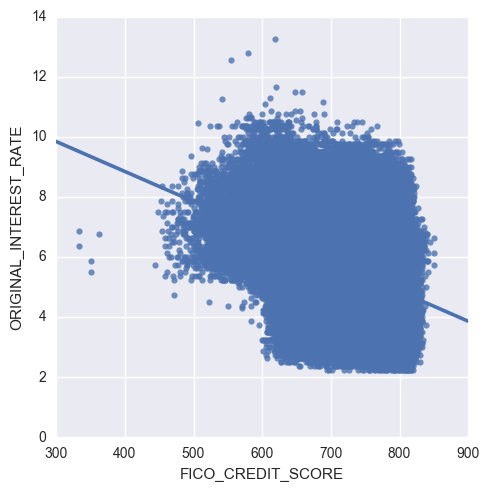

In [33]:
sns.lmplot('FICO_CREDIT_SCORE', 'ORIGINAL_INTEREST_RATE', df)
plt.xlabel('FICO_CREDIT_SCORE')
plt.ylabel('ORIGINAL_INTEREST_RATE')

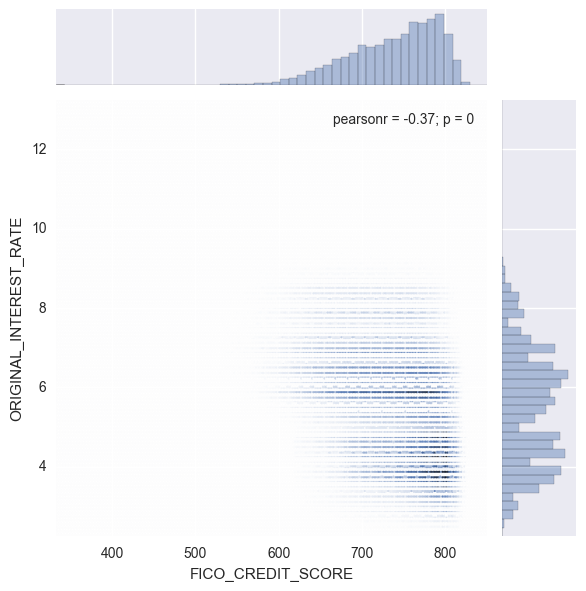

In [34]:
sns.jointplot('FICO_CREDIT_SCORE', 'ORIGINAL_INTEREST_RATE', df, kind='hex')

## CHANNEL
Disclosure indicates whether a Broker or Correspondent, as those terms are defined below, originated or was involved in the origination of the mortgage loan. If a Third Party Origination is applicable, but the Seller does not specify Broker or Correspondent, the disclosure will indicate “TPO Not Specified”. Similarly, if neither Third Party Origination nor Retail designations are available, the disclosure will indicate “TPO Not Specified.” If a Broker, Correspondent or Third Party Origination disclosure is not applicable, the mortgage loan will be designated as Retail, as defined below.

Broker is a person or entity that specializes in loan originations, receiving a commission (from a Correspondent or other lender) to match Borrowers and lenders. The Broker performs some or most of the loan processing functions, such as taking loan applications, or ordering credit reports, appraisals and title reports. Typically, the Broker does not underwrite or service the mortgage loan and generally does not use its own funds for closing; however, if the Broker funded a mortgage loan on a lender’s behalf, such a mortgage loan is considered a “Broker” third party origination mortgage loan. The mortgage loan is generally closed in the name of the lender who commissioned the Broker's services.
Correspondent is an entity that typically sells the Mortgages it originates to other lenders, which are not Affiliates of that entity, under a specific commitment or as part of an ongoing relationship. The Correspondent performs some, or all, of the loan processing functions, such as: taking the loan application; ordering credit reports, appraisals, and title reports; and verifying the Borrower's income and employment. The Correspondent may or may not have delegated underwriting and typically funds the mortgage loans at settlement. The mortgage loan is closed in the Correspondent's name and the Correspondent may or may not service the mortgage loan. The Correspondent may use a Broker to perform some of the processing functions or even to fund the loan on its behalf; under such circumstances, the mortgage loan is considered a “Broker” third party origination mortgage loan, rather than a “Correspondent” third party origination mortgage loan.

Retail Mortgage is a mortgage loan that is originated, underwritten and funded by a lender or its Affiliates. The mortgage loan is closed in the name of the lender or its Affiliate and if it is sold to Freddie Mac, it is sold by the lender or its Affiliate that originated it. A mortgage loan that a Broker or Correspondent completely or partially originated, processed, underwrote, packaged, funded or closed is not considered a Retail mortgage loan.
For purposes of the definitions of Correspondent and Retail, “Affiliate" means any entity that is related to another party as a consequence of the entity, directly or indirectly, controlling the other party, being controlled by the other party, or being under common control with the other party.

R = Retail

B = Broker

C = Correspondent

T = TPO Not Specified

9 = Not Available

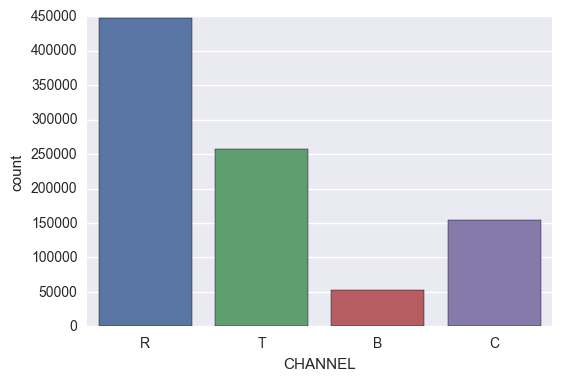

In [35]:
sns.countplot(df.CHANNEL)

## PREPAYMENT PENALTY MORTGAGE (PPM) FLAG

Denotes whether the mortgage is a PPM. A PPM is a mortgage with respect to which the borrower is, or at any time has been, obligated to pay a penalty in the event of certain repayments of principal.

Y=PPM

N=Not PPM


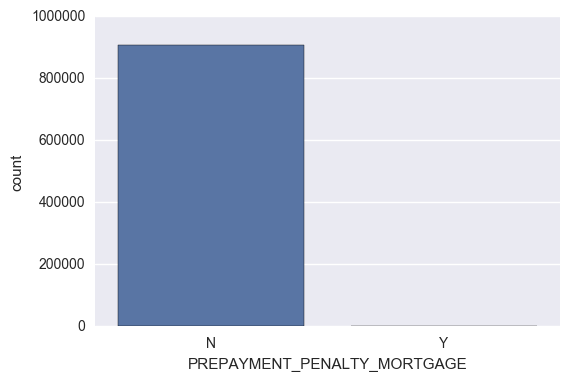

In [36]:
sns.countplot(df.PREPAYMENT_PENALTY_MORTGAGE)

In [37]:
df.PREPAYMENT_PENALTY_MORTGAGE[df.PREPAYMENT_PENALTY_MORTGAGE == 'Y'].count()

928

## PRODUCT TYPE

Denotes that the product is a fixed-rate mortgage. ***No need to plot, all are Fixed Rate Mortgages***

## PROPERTY STATE

A two-letter abbreviation indicating the state or territory within which the property securing the mortgage is located.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

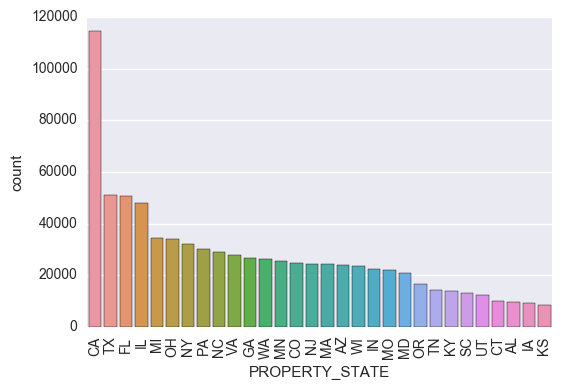

In [38]:
sns.countplot(df.PROPERTY_STATE,order=df.PROPERTY_STATE.value_counts().iloc[:30].index)
plt.xticks(rotation=90)

In [39]:
df.PROPERTY_STATE.value_counts().iloc[:30].values.sum() / df.PROPERTY_STATE.value_counts().values.sum()

0.90410430463757596

These top 30 states account for ~90% of the loans present in our dataset

## PROPERTY TYPE
Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or Single Family home.

If the Property Type is Not Available, this will be indicated by 99.

CO = Condo

PU=PUD

MH = Manufactured Housing

SF = 1-4 Fee Simple

CP = Co-op

99 = Not Available

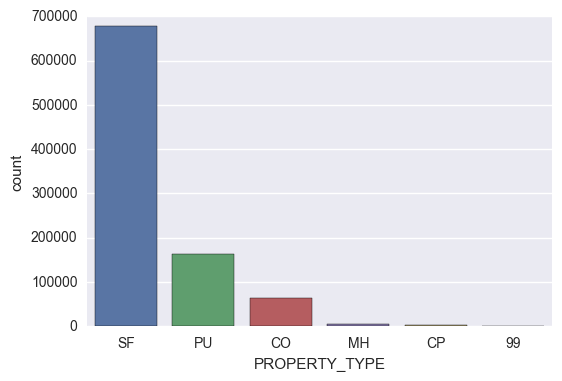

In [40]:
sns.countplot(df.PROPERTY_TYPE)

## POSTAL CODE
The postal code for the location of the mortgaged property.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

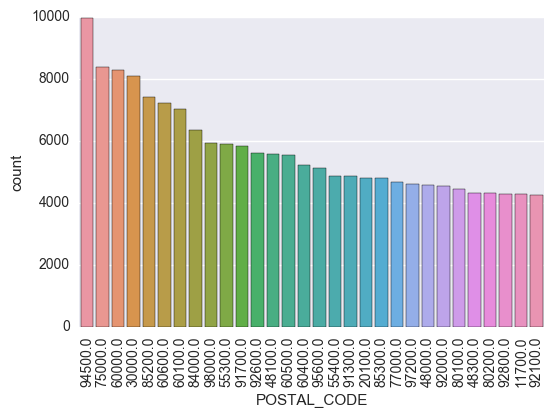

In [41]:
sns.countplot(df.POSTAL_CODE,order=df.POSTAL_CODE.value_counts().iloc[:30].index)
plt.xticks(rotation=90)

In [42]:
df.POSTAL_CODE.value_counts().iloc[:30].values.sum() / df.POSTAL_CODE.value_counts().values.sum()

0.18758247443018664

Our top 30 postal codes by count account for roughly ~19% of the postal codes present in our dataset.

## LOAN SEQUENCE NUMBER
Unique identifier assigned to each loan.

F1YYQnXXXXXX


F1 = product (Fixed Rate Mortgage);

YYQn = origination year and quarter; and,

XXXXXX = randomly assigned digits

In [43]:
df.LOAN_ID.head()

0    F199Q1000024
1    F199Q1000036
2    F199Q1000060
3    F199Q1000097
4    F199Q1000109
Name: LOAN_ID, dtype: object

In [44]:
df.LOAN_ID.str[2:4].value_counts()

09    50000
13    49999
16    49999
03    49999
99    49999
00    49999
04    49999
12    49999
06    49999
14    49999
15    49999
02    49999
07    49999
10    49999
05    49999
01    49999
11    49999
08    49998
17    12499
Name: LOAN_ID, dtype: int64

As noted in the data dictionary, the loan origination distribution is uniform.

In [45]:
df.LOAN_ID.str[4:6].value_counts()

Q1    237482
Q3    225000
Q2    225000
Q4    224999
Name: LOAN_ID, dtype: int64

As noted in the data dictionary, the distribution of loans originating in each quarter are approximately uniformly distributed.

## LOAN PURPOSE
Indicates whether the mortgage loan is a Cash- out Refinance mortgage, No Cash-out Refinance mortgage, or a Purchase mortgage.

Generally, a Cash-out Refinance mortgage loan is a mortgage loan in which the use of the loan amount is not limited to specific purposes. A mortgage loan placed on a property previously owned free and clear by the Borrower is always considered a Cash-out Refinance mortgage loan. Generally, a No Cash-out Refinance mortgage loan is a mortgage loan in which the loan amount is limited to the following uses:
* Pay off the first mortgage, regardless of its age
* Pay off any junior liens secured by the mortgaged property, that were used in their entirety to acquire the subject property
* Pay related closing costs, financing costs and prepaid items, and Disburse cash out to the Borrower (or any other payee) not to exceed 2% of the new refinance mortgage loan or $2,000, whichever is less.

As an exception to the above, for construction conversion mortgage loans and renovation mortgage loans, the amount of the interim construction financing secured by the mortgaged property is considered an amount used to pay off the first mortgage. Paying off unsecured liens or construction costs paid by the Borrower outside of the secured interim construction financing is considered cash out to the Borrower, if greater than $2000 or 2% of loan amount.

This disclosure is subject to various special exceptions used by Sellers to determine whether a mortgage loan is a No Cash-out Refinance mortgage loan.

P = Purchase

C = Cash-out Refinance

N = No Cash-out Refinance

9 = Not Available

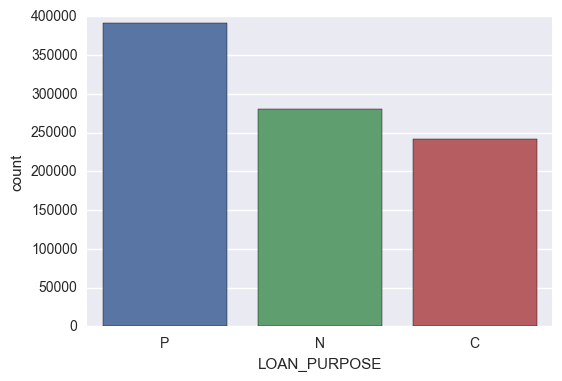

In [46]:
sns.countplot(df.LOAN_PURPOSE)

## ORIGINAL LOAN TERM
A calculation of the number of scheduled monthly payments of the mortgage based on the First Payment Date and Maturity Date.

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


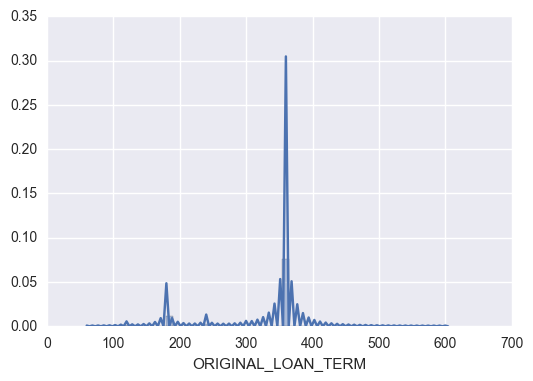

In [47]:
sns.distplot(df.ORIGINAL_LOAN_TERM)

In [48]:
df.ORIGINAL_LOAN_TERM.std()

65.95211486217154

In [49]:
df.ORIGINAL_LOAN_TERM.min()

60

In [50]:
df.ORIGINAL_LOAN_TERM.max()

604

In [51]:
df.ORIGINAL_LOAN_TERM.median()

360.0

In [52]:
df.ORIGINAL_LOAN_TERM.mean()

330.559683982461

The statistics above show that we will need to run at most 604 iterations of Bayesian updates if we choose month granularity.

## NUMBER OF BORROWERS
The number of Borrower(s) who are obligated to repay the mortgage note secured by the mortgaged property. Disclosure denotes only whether there is one borrower or more than one borrower associated with the mortgage note. This disclosure will not be updated to reflect any subsequent assumption of the mortgage note.

01 = 1 borrower

02 = > 1 borrowers

99 = Not Available


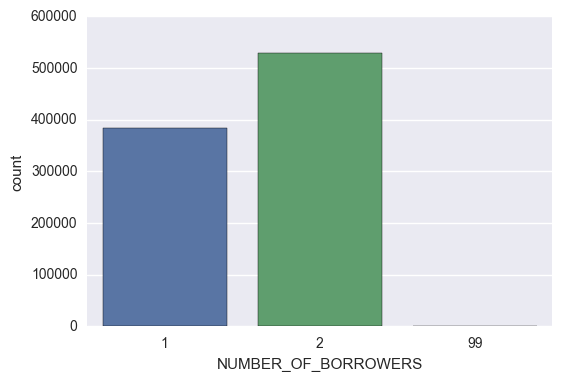

In [53]:
sns.countplot(df.NUMBER_OF_BORROWERS)

## SELLER NAME
The entity acting in its capacity as a seller of mortgages to Freddie Mac at the time of acquisition.

Seller Name will be disclosed for sellers with a total Original UPB representing 1% or more of the total Original UPB of all loans in the Dataset for a given calendar quarter. Otherwise, the Seller Name will be set to “Other Sellers”.

In [54]:
df.SELLER_NAME.nunique()

107

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

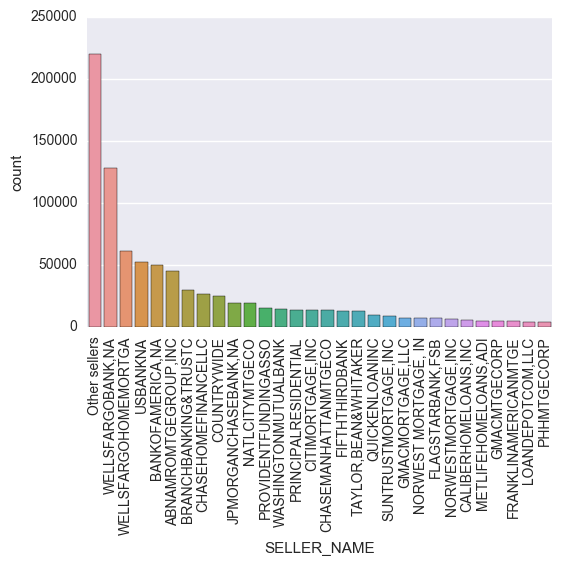

In [55]:
sns.countplot(df.SELLER_NAME,order=df.SELLER_NAME.value_counts().iloc[:30].index)
plt.xticks(rotation=90)

In [56]:
df.SELLER_NAME.value_counts().iloc[:30].values.sum() / df.SELLER_NAME.value_counts().values.sum()

0.92454856594274293

The top 30/48 sellers account for ~92% of the sellers in this sample dataset.

## SERVICER NAME
The entity acting in its capacity as the servicer of mortgages to Freddie Mac as of the last period for which loan activity is reported in the Dataset.

Servicer Name will be disclosed for servicers with a total Original UPB representing 1% or more of the total Original UPB of all loans in the Dataset for a given calendar quarter. Otherwise, the Servicer Name will be set to “Other Servicers”.

In [57]:
df.SERVICER_NAME.nunique()

73

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

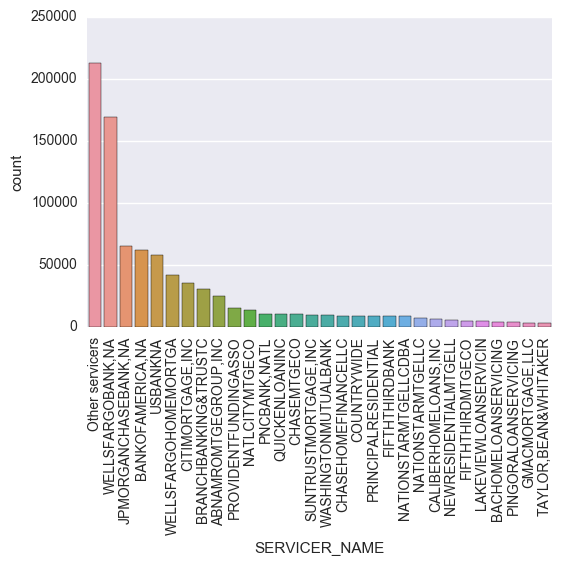

In [58]:
sns.countplot(df.SERVICER_NAME, order=df.SERVICER_NAME.value_counts().iloc[:30].index)
plt.xticks(rotation=90)

In [59]:
df.SERVICER_NAME.value_counts().iloc[:10].values.sum() / df.SERVICER_NAME.value_counts().values.sum()

0.78378179929225922

The top 10 services account for ~78% of the services present in the dataset.

# Fin!

This concludes the data exploration of the merged sample loan origination dataset.